# Loading modules

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets 
from math import exp
import time
from numpy import *
from random import shuffle

# Auxiliary functions

In [21]:
# the logistic function
def logistic_func(theta, x):
    t = x.dot(theta)
    g = np.zeros(t.shape)
    # split into positive and negative to improve stability
    g[t>=0.0] = 1.0 / (1.0 + np.exp(-t[t>=0.0])) 
    g[t<0.0] = np.exp(t[t<0.0]) / (1.0+ np.exp(t[t<0.0]))
    return g

# function to compute log-likelihood
def neg_log_like(theta, x, y):
    g = logistic_func(theta,x)
#     print(g.shape)
    return -sum(np.log(g[y>0.5])) - sum(np.log(1-g[y<0.5]))

# function to compute the gradient of the negative log-likelihood
def log_grad(theta, x, y):
    g = logistic_func(theta,x)
    return -x.T.dot(y-g)

def log_Hessian(theta, x):
    g = logistic_func(theta,x) #1000*1
    n = g.shape[0]
    return np.dot(np.dot(np.dot(x.T,np.diag(g.reshape(n))),np.diag(1-g.reshape(n))),x)

# Gradient descent for Logistic Regression

In [22]:
# implementation of gradient descent for logistic regression
def grad_desc(theta, x, y, alpha, tol, maxiter):
    nll_vec = []
    nll_vec.append(neg_log_like(theta, x, y))
    nll_delta = 2.0*tol
    iter = 0
    while (nll_delta > tol) and (iter < maxiter):
#         print(theta)
        theta = theta - (alpha * log_grad(theta, x, y)) 
        nll_vec.append(neg_log_like(theta, x, y))
        nll_delta = nll_vec[-2]-nll_vec[-1]
        iter += 1
    return theta, np.array(nll_vec)

# function to compute output of LR classifier
def lr_predict(theta,x):
    # form Xtilde for prediction
    shape = x.shape
    Xtilde = np.zeros((shape[0],shape[1]+1))
    Xtilde[:,0] = np.ones(shape[0])
    Xtilde[:,1:] = x
    return logistic_func(theta,Xtilde)

def Newton_method(theta, x, y, tol, maxiter):
    nll_vec = []
    nll_vec.append(neg_log_like(theta, x, y))
    nll_delta = 2.0*tol
    iter = 0
    while (nll_delta > tol) and (iter < maxiter):
        theta=theta-np.dot(np.linalg.inv(log_Hessian(theta,x)),log_grad(theta, x, y))#(1000,1)
        nll_vec.append(neg_log_like(theta, x, y))
        nll_delta = nll_vec[-2]-nll_vec[-1]
        iter += 1
    return theta, np.array(nll_vec)

def Sto_Grad_Desc(theta, x, y, alpha, tol, maxiter):
    nll_vec = []
    nll_vec.append(neg_log_like(theta, x, y))
    nll_delta = 2.0*tol
    iter = 0
    index_pool = list(range(x.shape[0]))
    flunc = 3
    while (flunc > 0) and (iter < maxiter):
        # randomly pick a sample
        shuffle(index_pool)
        loss = 0
        for index in index_pool:
            if not iter < maxiter:
                return theta, np.array(nll_vec)
            x_i = x[index]
            y_i = y[index]
            # update theta
            theta = theta - alpha * log_grad(theta, x_i, y_i)
            loss += neg_log_like(theta, x_i, y_i)
            iter += 1
        nll_vec.append(loss)
        nll_delta = nll_vec[-2] - nll_vec[-1]
        # this part is used to prevent the inflence of fluncation
        if nll_delta > tol:
            flunc = 3
        else:
            flunc -= 1
    return theta, np.array(nll_vec), iter

# Generating dataset Sample Number 1000

In [23]:
np.random.seed(2020) # Set random seed so results are repeatable (do not change)
x,y = datasets.make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=6.0)

## build classifier form Xtilde
shape = x.shape
xtilde = np.zeros((shape[0],shape[1]+1))
xtilde[:,0] = np.ones(shape[0])
xtilde[:,1:] = x

# Run Gradient Descent

In [24]:
# Initialize theta to zero
theta = np.zeros(shape[1]+1)
# Run gradient descent
#alpha = 0.0001,maxiter=10000
alpha = 0.0001
tol = 1e-6
maxiter = 10000

start_time = time.time()
#using Gradient Descent
theta_gd, cost_gd = grad_desc(theta,xtilde,y,alpha,tol,maxiter)
print(theta_gd)
stop_time = time.time()
print("Final GD cost: %.3f after %d iterations in %f seconds" % (cost_gd[-1],cost_gd.size,stop_time-start_time))

[ 1.89927372 -0.29532015 -0.36595797]
Final GD cost: 226.365 after 1924 iterations in 0.256540 seconds


# Run Newton Method

In [25]:
# Initialize theta to zero
theta = np.zeros(shape[1]+1)
# Run gradient descent
#alpha = 0.0001,maxiter=10000
alpha = 0.0001
tol = 1e-6
maxiter = 10000

#using Newton's Method
start_time = time.time()
theta_ngd, cost_ngd = Newton_method(theta,xtilde,y,tol,maxiter)
print(theta_ngd)
stop_time = time.time()
print("Final Newton cost: %.3f after %d iterations in %f seconds" % (cost_ngd[-1],cost_ngd.size,stop_time-start_time))

[ 1.90256321 -0.2956653  -0.36619489]
Final Newton cost: 226.365 after 8 iterations in 0.040783 seconds


# Run SGD

In [26]:
# Initialize theta to zero
theta = np.zeros(shape[1]+1)
# Run gradient descent
#alpha = 0.0001,maxiter=10000
alpha = 0.001
tol = 1e-6
maxiter = 100000

start_time = time.time()
#using SGD
theta_sgd, cost_sgd, iter = Sto_Grad_Desc(theta,xtilde,y,alpha,tol,maxiter)

print(theta_sgd)
stop_time = time.time()
print("Final SGD cost: %.3f after %d iterations in %f seconds" % (cost_sgd[-1],iter,stop_time-start_time))

[ 1.59874636 -0.2550862  -0.35130957]
Final SGD cost: 225.239 after 45000 iterations in 2.052677 seconds


# Generating dataset Sample Number 100,000

In [9]:
np.random.seed(2020) # Set random seed so results are repeatable (do not change)
x,y = datasets.make_blobs(n_samples=100000,n_features=2,centers=2,cluster_std=6.0)

## build classifier form Xtilde
shape = x.shape
xtilde = np.zeros((shape[0],shape[1]+1))
xtilde[:,0] = np.ones(shape[0])
xtilde[:,1:] = x

# Run SGD in Sample Number 100,000

In [13]:
# Initialize theta to zero
theta = np.zeros(shape[1]+1)
# Run gradient descent
#alpha = 0.0001,maxiter=10000
alpha = 0.0001
tol = 1e-6
maxiter = 100000

start_time = time.time()
#using SGD
theta_sgd, cost_sgd, iter = Sto_Grad_Desc(theta,xtilde,y,alpha,tol,maxiter)

print(theta_sgd)
stop_time = time.time()
print("Final SGD cost: %.3f after %d iterations in %f seconds" % (cost_sgd[-1],iter,stop_time-start_time))

[ 0.7247389  -0.17032292 -0.29207908]
Final SGD cost: 28488.893 after 100000 iterations in 4.063194 seconds


#  Run Gradient Descent

In [23]:
# Initialize theta to zero
theta = np.zeros(shape[1]+1)
# Run gradient descent
#alpha = 0.0001,maxiter=10000
alpha = 0.000001
tol = 1e-6
maxiter = 10000

start_time = time.time()
#using Gradient Descent
theta_gd, cost_gd = grad_desc(theta,xtilde,y,alpha,tol,maxiter)
print(theta_gd)
stop_time = time.time()
print("Final GD cost: %.3f after %d iterations in %f seconds" % (cost_gd[-1],cost_gd.size,stop_time-start_time))

[ 1.80175736 -0.26290611 -0.33760097]
Final GD cost: 23830.493 after 2554 iterations in 30.937585 seconds


# Run Newton Method

In [53]:
# Initialize theta to zero
theta = np.zeros(shape[1]+1)
# Run gradient descent
#alpha = 0.0001,maxiter=10000
tol = 1e-6
maxiter = 10000

#using Newton's Method
start_time = time.time()
theta_ngd, cost_ngd = Newton_method(theta,xtilde,y,tol,maxiter)
print(theta_ngd)
stop_time = time.time()
print("Final Newton cost: %.3f after %d iterations in %f seconds" % (cost_ngd[-1],cost_ngd.size,stop_time-start_time))

[ 1.80207019 -0.26293566 -0.33762014]
Final Newton cost: 23830.493 after 8 iterations in 600.265969 seconds


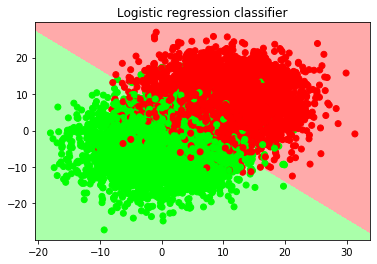

In [128]:
## Plot the decision boundary. 
# Begin by creating the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_delta = (x[:, 0].max() - x[:, 0].min())*0.05 # add 5% white space to border
y_delta = (x[:, 1].max() - x[:, 1].min())*0.05
x_min, x_max = x[:, 0].min() - x_delta, x[:, 0].max() + x_delta
y_min, y_max = x[:, 1].min() - y_delta, x[:, 1].max() + y_delta
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr_predict(theta_gd,np.c_[xx.ravel(), yy.ravel()])

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

## Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)

## Show the plot
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic regression classifier")
plt.show()

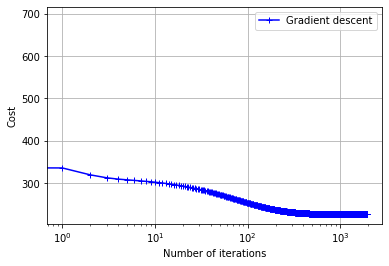

In [27]:
# plt.semilogx((cost_ngd),'rx-',label='Newton Method')
# plt.semilogx((cost_sgd),'g*-',label='SGD')
plt.semilogx((cost_gd),'b+-',label='Gradient descent')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.savefig('/Users/gexueren/Desktop/6254/Code/Latex/HW#6/Q1.jpg')

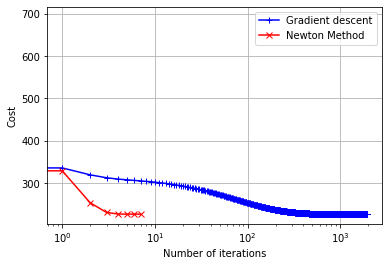

In [28]:
plt.semilogx((cost_gd),'b+-',label='Gradient descent')
plt.semilogx((cost_ngd),'rx-',label='Newton Method')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.savefig('/Users/gexueren/Desktop/6254/Code/Latex/HW#6/Q2.jpg')

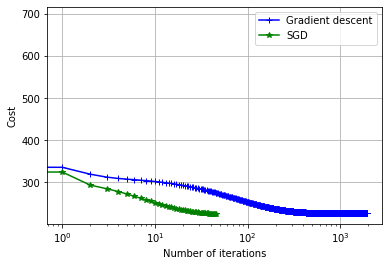

In [29]:
plt.semilogx((cost_gd),'b+-',label='Gradient descent')
plt.semilogx((cost_sgd),'g*-',label='SGD')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.savefig('/Users/gexueren/Desktop/6254/Code/Latex/HW#6/Q4.jpg')